# Plot days non-compliant by region

This notebook relies on output from:
1. [process_netcdf.py](https://github.com/RachaelDMueller/SalishSeaModel-analysis/blob/main/py_scripts/process_netcdf.py)
2. [calc_noncompliance](https://github.com/RachaelDMueller/SalishSeaModel-analysis/blob/main/py_scripts/calc_noncompliance.py)

The first python script creates netcdf with min, daily DO values.  The second creates excel spreadsheets of daily non-compliance by region. 

In [1]:
import os
import yaml
import numpy as np
import pandas
import pathlib
import time
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
case = "main"
# load configuration file for this case
with open(f'../../etc/SSM_config_{case}.yaml', 'r') as file:
    ssm = yaml.safe_load(file)
    # get shapefile path    
    shp = ssm['paths']['shapefile']
    
graphics_dir = pathlib.Path(ssm['paths']['graphics'])/case
xlsx_file_path=f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/spreadsheets/{case}_wc_noncompliant_m0p25.xlsx"

In [3]:
xlsx_file_path

'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/main/spreadsheets/main_wc_noncompliant_m0p25.xlsx'

In [4]:
ncdf = pandas.read_excel(xlsx_file_path)
ncdf = ncdf.set_index("Unnamed: 0")
ncdf

,M.tp1,M.tp2,M.tp3,M.tp4,M.tp5,M.tp6,M.tp7,M.tp8,M.tp9,M.r1,M.r2,2014 Conditions
Unnamed: 0,,,,,,,,,,,,
Hood,118,115,134,127,114,133,122,142,135,137,170,146
Main,125,125,145,140,127,139,125,158,153,156,167,162
SJF_Admiralty,0,0,0,0,0,0,0,0,0,0,0,0
SOG_Bellingham,36,35,37,36,35,37,36,37,37,37,39,39
South_Sound,165,165,175,173,167,173,166,176,175,176,178,176
Whidbey,137,139,161,154,137,159,146,167,162,166,178,174
ALL_REGIONS,200,198,222,217,200,219,207,225,224,225,242,229


In [5]:
ncdf = pandas.read_excel(xlsx_file_path)
ncdf = ncdf.set_index("Unnamed: 0")
ncdf = ncdf.transpose()
del ncdf["ALL_REGIONS"]
# remove the "ALL_REGIONS" row
if case=='SOG_NB':
    # remove 1c and 2a
    ncdf=ncdf.drop('1c')
    ncdf=ncdf.drop('2a')
#elif case=='main':
# *** This adds NAN values to 2014 row ***
#     ncdf=ncdf.reindex([
#          '2014 conditions',
#          'Mtp1',
#          'Mtp2',
#          'Mtp3',
#          'Mtp4',
#          'Mtp5',
#          'Mtp6',
#          'Mtp7',
#          'Mtp8',
#          'Mtp9',
#          'Mr1'])
# ncdf.index.names = ['runs']
ncdf

Unnamed: 0,Hood,Main,SJF_Admiralty,SOG_Bellingham,South_Sound,Whidbey
M.tp1,118,125,0,36,165,137
M.tp2,115,125,0,35,165,139
M.tp3,134,145,0,37,175,161
M.tp4,127,140,0,36,173,154
M.tp5,114,127,0,35,167,137
M.tp6,133,139,0,37,173,159
M.tp7,122,125,0,36,166,146
M.tp8,142,158,0,37,176,167
M.tp9,135,153,0,37,175,162
M.r1,137,156,0,37,176,166


In [6]:
color_list = [ssm['region']['colors'][region] for region in [*ssm['region']['colors']] if region != "ALL_REGIONS"]

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


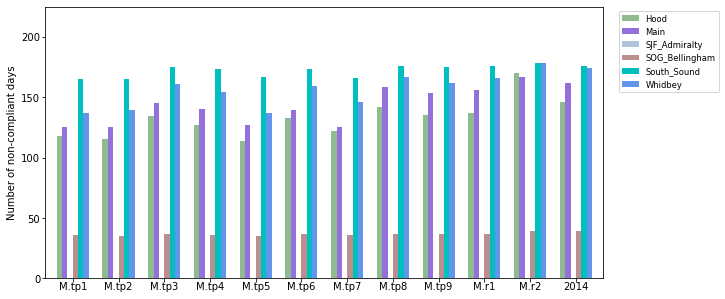

In [7]:
if case=='whidbey':
#     ncdf=ncdf.reindex(["2014 conditions","3b: No Whidbey WWTPs", "3c: No Small WWTPs < 100 TN Kg/day ","3d: No Medium WWTPs 100 to 1000 TN Kg/day","3e: No Everett North & South WWTPs",
#               "3f: No Whidbey Rivers","3g: 2x 2014 River Load","3h: No Everett North (River)","3i: No Everett South (Deep)",])
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5),
                       gridspec_kw={
                           'width_ratios': [1],
                           'height_ratios': [1],
                       'wspace': 0.4,
                       'hspace': 0.2})
    ncdf.plot(ax=ax,
        kind="bar",
        color=color_list,
        legend=False,          
        ecolor='grey',
        width=0.7
    )
    ax.set_ylabel("Number of non-compliant days")
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    ax.set_yticks([0, 50, 100, 150, 200])
    ax.set_ylim(0,225)
    
    # Create x-axis labels
    values = [ncdf.index[index] for index in np.arange(len(ncdf.index))]
    labels = [value.split(':')[0] for value in values]
    labels[0] = labels[0].split(' ')[0]
    ax.set_xticklabels(labels, rotation=0)
    # ax.set_xticklabels([
    # '2014\nConditions',
    # '3b',
    # '3c',
    # '3d',
    # '3e',
    # '3f',
    # '3g',
    # '3h',
    # '3i'
    # ], rotation=0)

    plt.savefig(graphics_dir/f'{case}_NoncompliantDaysByRegion_notext_reordered.png', dpi=1000)
    
elif case=='main':    

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5),
                       gridspec_kw={
                           'width_ratios': [1],
                           'height_ratios': [1],
                       'wspace': 0.4,
                       'hspace': 0.2})
    ncdf.plot(ax=ax,
        kind="bar",
        color=color_list,
        legend=False,          
        ecolor='grey',
        width=0.7
    )
    ax.set_ylabel("Number of non-compliant days")
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

    ax.set_yticks([0, 50, 100, 150, 200])
    ax.set_ylim(0,225)
    
    # Create x-axis labels
    values = [ncdf.index[index] for index in np.arange(len(ncdf.index))]
    labels = [value.split(':')[0] for value in values]
    labels[0] = labels[0].split(' ')[0]
    labels[-1]='2014'
    ax.set_xticklabels(labels, rotation=0)
    # ax.set_xticklabels([
    # '2014\nConditions',
    # '3b',
    # '3c',
    # '3d',
    # '3e',
    # '3f',
    # '3g',
    # '3h',
    # '3i'
    # ], rotation=0)

    plt.savefig(graphics_dir/f'{case}_NoncompliantDaysByRegion_notext_reordered.png', dpi=1000)

In [8]:
graphics_dir

PosixPath('/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/main')

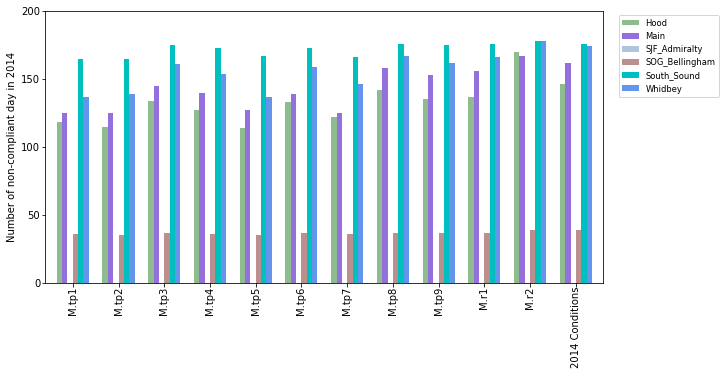

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5),
                       gridspec_kw={
                           'width_ratios': [1],
                           'height_ratios': [1],
                       'wspace': 0.4,
                       'hspace': 0.2})
ncdf.plot(ax=ax,
    kind="bar",
    color=color_list,
    legend=False,          
    ecolor='grey',
    width=0.7
)
ax.set_ylabel("Number of non-compliant day in 2014")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

ax.set_yticks([0, 50, 100, 150, 200])
if case=='SOG_NB':
    ax.set_ylim(0,200)
    ax.set_xticklabels(
        ["1b", "1d", "1e", "2b", "2014\nConditions"],
        rotation=45
    )
elif case=='whidbey':
    ax.set_ylim(0,225)
    #ax.set_xticklabels(labels, rotation=0)
    # ax.set_xticklabels([
    # '3b\nNo WWTPs',
    # '3f\nNo Rivers',
    # '3c\nNo WWTPs\n< 100',
    # '3d\nNo WWTPs\n100-1000',
    # '3e\nNo Everett\nN & S WWTPs',
    # '3h\nNo Everett N ',
    # '3i\nNo Everett S',
    # '3g\n2x River',
    # '2014\nConditions'
    # ], rotation=90)
    
plt.savefig(graphics_dir/f'{case}_NoncompliantDaysByRegion.png', dpi=1000)

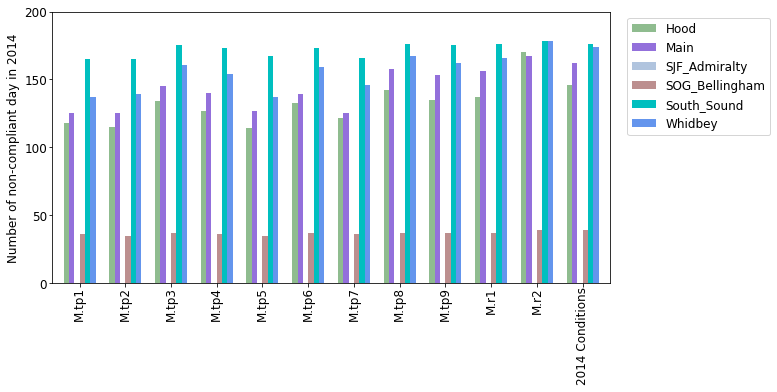

In [10]:

# graphic specifications.  I prefer to include these in a global file but haven't yet found a way to do that successfully on Hyak
# pushing the "easy" button
mpl.rc('font', size=11)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=16)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5),
                       gridspec_kw={
                           'width_ratios': [1],
                           'height_ratios': [1],
                       'wspace': 0.4,
                       'hspace': 0.2})
ncdf.plot(ax=ax,
    kind="bar",
    color=color_list,
    legend=False,          
    ecolor='grey',
    width=0.7
)
ax.set_ylabel("Number of non-compliant day in 2014")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

ax.set_yticks([0, 50, 100, 150, 200])
if case=='SOG_NB':
    ax.set_ylim(0,200)
    ax.set_xticklabels(
        ["1b", "1d", "1e", "2b", "2014\nConditions"],
        rotation=45
    )
elif case=='whidbey':
    ax.set_ylim(0,225)
    # ax.set_xticklabels([
    # '3b',
    # '3f',
    # '3c',
    # '3d',
    # '3e',
    # '3h',
    # '3i',
    # '3g',
    # '2014\nConditions'
    # ], rotation=0)
    
plt.savefig(graphics_dir/f'{case}_NoncompliantDaysByRegion_notext.png', dpi=1000)

In [ ]:
s